<div style="
    background-color: #f2f2f2;
    padding: 15px;
    text-align: center;
">
    <h1 style="
        margin: 0;
        font-family: Arial, sans-serif;
        color: #333;
    ">
        WHOLESALE CUSTOMERS DATA
    </h1>
</div>


# IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz

# LOADING WHOLESALE CUSTEMERS DATASET

In [2]:
w_ds=pd.read_csv(r"C:\Users\RASHID\Downloads\Wholesale customers data.csv")

In [3]:
w_ds

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# CHECKING SHAPE AND COLUMNS

In [4]:
w_ds.shape

(440, 8)

In [56]:
# 440 raws and 8 columns are present these dataset

In [5]:
w_ds.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

| Column Name      | Simple Explanation                                      |
| ---------------- | ------------------------------------------------------- |
| Channel          | Type of customer (Hotel/Restaurant or Retail store)     |
| Region           | Area where the customer is located                      |
| Fresh            | Money spent on fresh food like fruits, vegetables, meat |
| Milk             | Money spent on milk and dairy products                  |
| Grocery          | Money spent on packaged grocery items                   |
| Frozen           | Money spent on frozen food items                        |
| Detergents_Paper | Money spent on cleaning and paper products              |
| Delicassen       | Money spent on specialty food items                     |


| Column           | Importance Level | Key Insight                |
| ---------------- | ---------------- | -------------------------- |
| Channel          | ⭐⭐⭐⭐⭐            | Defines customer type      |
| Region           | ⭐⭐               | Geographic influence       |
| Fresh            | ⭐⭐⭐⭐             | Horeca indicator           |
| Milk             | ⭐⭐⭐              | Retail demand              |
| Grocery          | ⭐⭐⭐⭐⭐            | Core consumption           |
| Frozen           | ⭐⭐⭐              | Storage & bulk buying      |
| Detergents_Paper | ⭐⭐⭐⭐⭐            | Best channel discriminator |
| Delicassen       | ⭐⭐               | Premium behavior           |


# CHECKING INFO AND DESCRIBE

In [6]:
w_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
w_ds.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# MISSING VALUES CHECKING

In [8]:
w_ds.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# NO Missing values present 

In [59]:
# Show each columns unique values

In [9]:
for i in w_ds.columns:
    print(i)
    print(w_ds[i].unique())

Channel
[2 1]
Region
[3 1 2]
Fresh
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388   6300

# DROPING UNWANTED COLUMNS

In [10]:
w_ds.drop(['Region','Delicassen','Region','Frozen'],axis=1,inplace=True)

In [11]:
w_ds

,Channel,Fresh,Milk,Grocery,Detergents_Paper
0,2,12669,9656,7561,2674
1,2,7057,9810,9568,3293
2,2,6353,8808,7684,3516
3,1,13265,1196,4221,507
4,2,22615,5410,7198,1777
...,...,...,...,...,...
435,1,29703,12051,16027,182
436,1,39228,1431,764,93
437,2,14531,15488,30243,14841
438,1,10290,1981,2232,168


In [60]:
# these 'Region','Delicassen','Region','Frozen' 4 Columns are removed ,because less importance than others

In [12]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler

In [13]:
scaler=StandardScaler()

In [14]:
scaled=scaler.fit_transform(w_ds)

In [15]:
w_ds=pd.DataFrame(scaled,columns=w_ds.columns)

In [16]:
w_ds

,Channel,Fresh,Milk,Grocery,Detergents_Paper
0,1.448652,0.052933,0.523568,-0.041115,-0.043569
1,1.448652,-0.391302,0.544458,0.170318,0.086407
2,1.448652,-0.447029,0.408538,-0.028157,0.133232
3,-0.690297,0.100111,-0.624020,-0.392977,-0.498588
4,1.448652,0.840239,-0.052396,-0.079356,-0.231918
...,...,...,...,...,...
435,-0.690297,1.401312,0.848446,0.850760,-0.566831
436,-0.690297,2.155293,-0.592142,-0.757165,-0.585519
437,1.448652,0.200326,1.314671,2.348386,2.511218
438,-0.690297,-0.135384,-0.517536,-0.602514,-0.569770


partitional

In [17]:
from sklearn.cluster import KMeans

  File "C:\Users\RASHID\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\RASHID\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RASHID\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RASHID\anaconda3\Lib\subproc

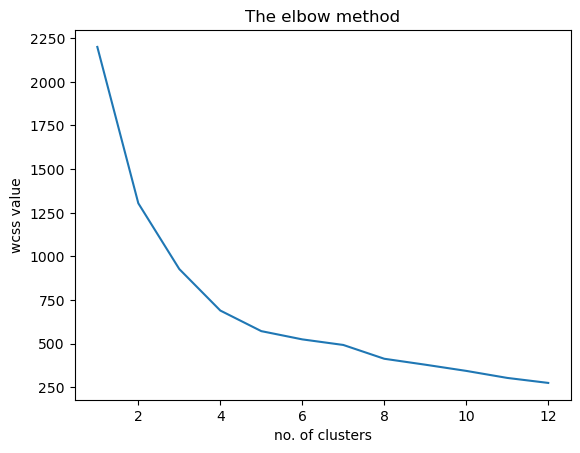

In [18]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(w_ds)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

In [19]:
w_ds=w_ds.values
w_ds

array([[ 1.44865163,  0.05293319,  0.52356777, -0.04111489, -0.04356873],
       [ 1.44865163, -0.39130197,  0.54445767,  0.17031835,  0.08640684],
       [ 1.44865163, -0.44702926,  0.40853771, -0.0281571 ,  0.13323164],
       ...,
       [ 1.44865163,  0.20032554,  1.31467078,  2.34838631,  2.51121768],
       [-0.69029709, -0.13538389, -0.51753572, -0.60251388, -0.56977032],
       [-0.69029709, -0.72930698, -0.5559243 , -0.57322717, -0.50488752]])

In [20]:
type(w_ds)

numpy.ndarray

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(w_ds)
y_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [22]:
from sklearn.decomposition import PCA

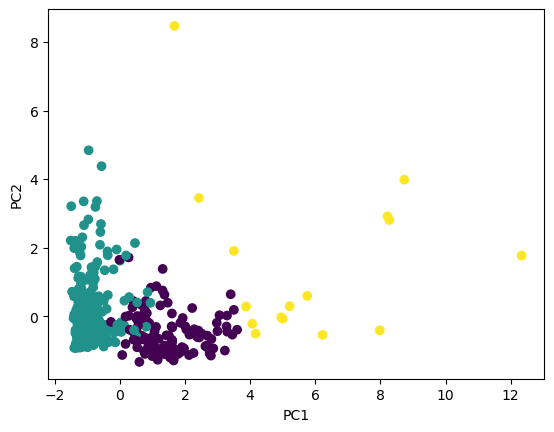

In [23]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(w_ds)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [24]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_reduced,y_kmeans)
print('silhouette score:',score)

silhouette score: 0.5244439814448562


In [25]:
new=[[1.448652,0.052933,0.523568,-0.041115,-0.043569]]

In [26]:
pr = kmeans.predict(new)
pr

array([0], dtype=int32)

DBSACN

In [27]:
w_ds

array([[ 1.44865163,  0.05293319,  0.52356777, -0.04111489, -0.04356873],
       [ 1.44865163, -0.39130197,  0.54445767,  0.17031835,  0.08640684],
       [ 1.44865163, -0.44702926,  0.40853771, -0.0281571 ,  0.13323164],
       ...,
       [ 1.44865163,  0.20032554,  1.31467078,  2.34838631,  2.51121768],
       [-0.69029709, -0.13538389, -0.51753572, -0.60251388, -0.56977032],
       [-0.69029709, -0.72930698, -0.5559243 , -0.57322717, -0.50488752]])

In [28]:
epsilon=0.53
min_samples=3
dbscan=DBSCAN(eps=epsilon,min_samples=min_samples)
labels=dbscan.fit_predict(X_reduced)

In [29]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

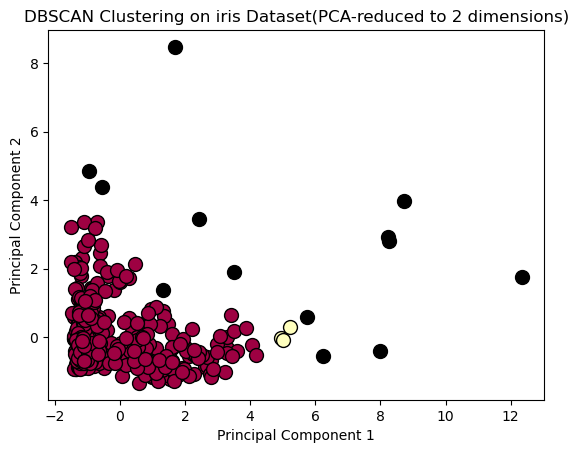

In [30]:
unique_labels=set(labels)
colors=[plt.cm.Spectral(each)for each in np.linspace(0,1,len(unique_labels))]
for k,col in zip(unique_labels,colors):
    if k== -1:
        col=[0,0,0,1]
    class_member_mask=(labels==k)
    xy=X_reduced[class_member_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=10)
plt.title("DBSCAN Clustering on iris Dataset(PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
           

In [31]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1)}

In [32]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_reduced,labels)
print('silhouette score:',score)

silhouette score: 0.5758302924418375


HIERARCHY

In [33]:
import scipy.cluster.hierarchy as sch

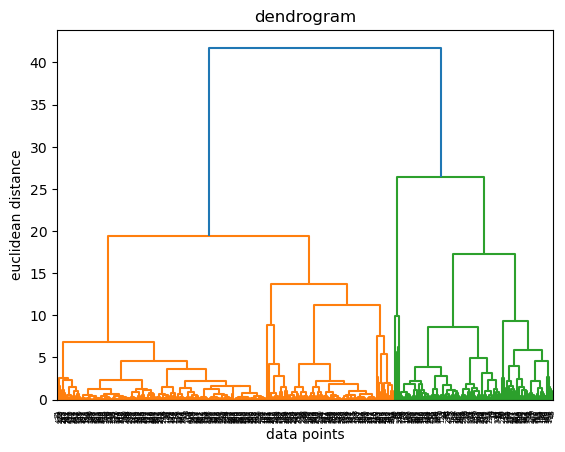

In [34]:
dendrogram=sch.dendrogram(sch.linkage(w_ds,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(X_reduced)
y_ahc

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [37]:
from sklearn.metrics import silhouette_score
scoreH=silhouette_score(X_reduced,y_ahc)

In [38]:
scoreH

np.float64(0.5426416694909197)

# fuzzy

In [39]:
import skfuzzy as fuzz

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

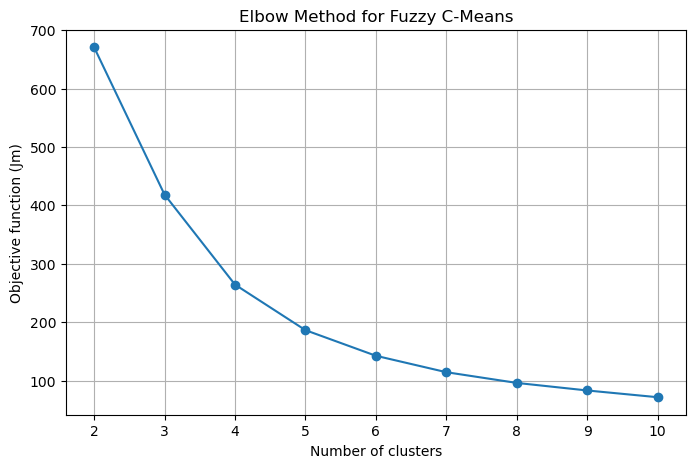

In [40]:
X = X_reduced.T
cluster_range = range(2, 11)

jm_values = []

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X,
        c=c,
        m=2.0,            # fuzziness coefficient
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])  
    plt.figure(figsize=(8, 5))
plt.plot(cluster_range, jm_values, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Objective function (Jm)")
plt.title("Elbow Method for Fuzzy C-Means")
plt.grid(True)
plt.show()


In [49]:
n_clusters = 3
m = 1.7
error = 1e-5
maxiter = 2003

In [50]:
import skfuzzy as fuzz

# 1. Run Fuzzy C-Means (cmeans returns multiple outputs)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_reduced.T, c=2, m=2, error=0.005, maxiter=1000
)

# In skfuzzy, the full membership matrix 'u' has the shape (c, N) -> (2, 440).
# You are likely assigning 'u' to the wrong variable or running the function on the wrong data.

# 2. Transpose 'u' to get (N, c) -> (440, 2)
u_transposed = u.T

# 3. Calculate hard clusters
hard_clusters = np.argmax(u_transposed, axis=1)

# hard_clusters should now have a length of 440.

score = silhouette_score(X_reduced, hard_clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5511803003785717


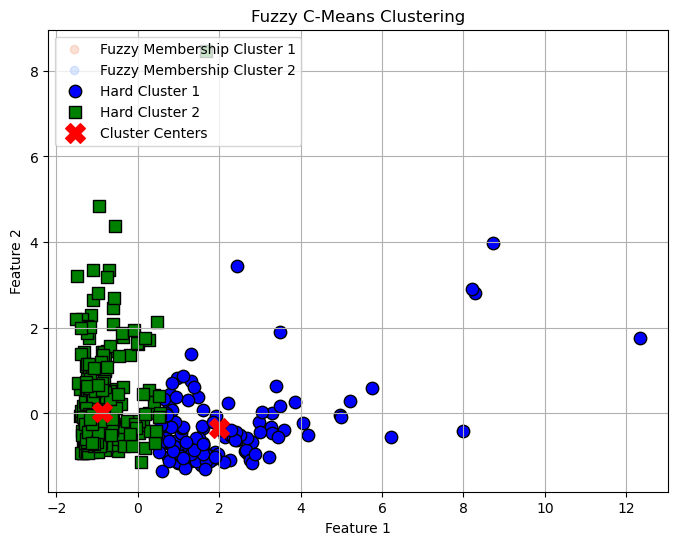

In [54]:
n_clusters = u.shape[0]  # ensures no index error

fig, ax = plt.subplots(figsize=(8, 6))

# Fuzzy membership visualization
for i in range(n_clusters):
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        c=u[i],                # membership of cluster i
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )

# Hard clusters
markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = X_reduced[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )

# Cluster centers
ax.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()
